<a href="https://colab.research.google.com/github/EderCruz/Alura-ImersaoDados/blob/main/Eder_Cruz_Barbosa_Projeto_modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import numpy as np
#import seaborn as sns

#Premissa e Hipotese
A crise sanitária provocada pela pandemia de COVID-19 acarretou um cenário nunca antes vivenciado pela humanidade em âmbito global. Consigo também agravou as crises humanitárias já existentes. Aspectos econômicos, sanitário e sociais foram profundamente afetados. Nos centros urbanos, os fatores relativos a qualidade de vida e saúde mental também sofreram grandes prejuízos. Desemprego, violência doméstica, falta de perspectiva, violência urbana, isolamento social, todos esses aspectos afetam a saúde mental dos indivíduos. Os  especialistas da área de saúde mental predizem que os casos de transtornos mentais estão aumentando e a perspectiva é que cresçam ainda mais. 

Portanto, a **hipótese** sugerida neste trabalho é: **O COVID-19 agravou os aparecimentos de doenças relacionadas ao transtorno mental e de comportamento, como Lesões Autoprovocadas Espontâneas , tentativas de suicídio,  e óbito por Lesões Autoprovocadas Espontâneas, suicídio.**

Para verificar a validade da hipótese serão realizados estudos que objetivam relacionar os aumentos de casos de COVID-19 com os casos de internação de Transtornos Mentais ou de Comportamento, neste como subgrupo especificio os casos de internações de Lesões Autoprovocadas Espontaneamente (LAE), que indicam tentativa de suícidio.


#Método

Plotar os gráficos das regiões do Brasil do período de Janeiro de 2019 a Agosto de 2020, com os dados referente a:
 - Internação por Transtornos Mentais ou de Comportamento
 - Internação por Lesões Autoprovocadas Espontaneamente (LAE)
 - Óbitos Internação por Lesões Autoprovocadas Espontaneamente (LAE)
 - Casos de Covid 19
Verficar a relação entre as tendência de crescimento, ou decresimo dos quantitativos das informações obtidas nos gráficos.


In [504]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carregamento das bases de dados e tratamento das tabelas
Todas as fontes de dados foram obtidas da platafora TABNET,
Com exceção da casos de covid obtida da plataforma Brasil.io

In [505]:

df_transtornos_mentais_internacoes_2019_2020 = pd.read_csv('/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/transtornos_mentais_por_regiao_br_internacoes_2019_2020.csv',
                                                            encoding='latin-1', skiprows=4,skipfooter = 6, sep=';', engine = 'python')
df_lesoes_autoprovocadas_2019_2020 =  pd.read_csv('/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/Internacoes_leoes_autoprovocadas_voluntariamente-jan-2019-set2020.csv',
                                                            encoding='latin-1', skiprows=5,skipfooter = 6, sep=';', engine = 'python')
df_obitos_lesoes_autoprovocadas_2019_2020  = pd.read_csv('/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/Obitos-lesao_autoprovocada-regiao-jan2019-ago2020.csv',
                                                            encoding='latin-1', skiprows=4,skipfooter = 6, sep=';', engine = 'python')
df_casos_covid= pd.read_csv('/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/COVID19-BRASILIO-06-11-2020.csv.gz', engine = 'python',
                                                            encoding='utf-8', sep=',')

###Internações por Transtornos Mentais e Comportamentais

In [506]:
df_transtornos_mentais_internacoes_2019_2020.set_index('Região', inplace=True)
df_transtornos_mentais_internacoes_2019_2020

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total
Região,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,720,622,629,703,767,631,484,593,521,789,679,599,720,630,630,553,480,538,833,590,184,12895
2 Região Nordeste,3232,3299,3138,3286,3312,3273,3416,3540,3570,3443,3474,3377,3514,3388,3177,2717,2047,2398,2684,2898,2652,65835
3 Região Sudeste,7991,7297,7435,7359,7789,7235,7861,8286,8116,8481,8131,7880,8195,7728,7075,5460,5398,5348,5958,5621,5834,150478
4 Região Sul,6366,6335,6377,6469,6525,6119,6394,5943,6288,6874,6306,6235,6222,6248,6060,5219,4638,4538,4639,4384,4927,123106
5 Região Centro-Oeste,1552,1583,1658,1573,1753,1613,1418,1659,1594,1593,1581,1560,1632,1644,1530,1426,1174,1154,1285,1203,1077,31262
Total,19861,19136,19237,19390,20146,18871,19573,20021,20089,21180,20171,19651,20283,19638,18472,15375,13737,13976,15399,14696,14674,383576


###Internações por Lesões Autoprovocadas Expontâneas

In [507]:
df_lesoes_autoprovocadas_2019_2020.set_index('Região', inplace=True)
df_lesoes_autoprovocadas_2019_2020

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total
Região,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,33,36,26,31,26,17,35,28,29,33,31,35,27,37,32,30,23,22,21,17,17,586
2 Região Nordeste,144,92,131,185,166,68,116,99,115,109,115,116,158,111,93,89,69,86,90,76,81,2309
3 Região Sudeste,525,465,533,481,544,465,459,449,559,610,646,537,565,543,534,356,384,347,409,371,383,10165
4 Região Sul,112,111,119,119,146,122,94,107,116,137,142,138,121,153,135,89,93,92,85,92,100,2423
5 Região Centro-Oeste,62,61,50,54,60,52,67,97,105,91,85,92,96,118,92,75,66,67,54,50,51,1545
Total,876,765,859,870,942,724,771,780,924,980,1019,918,967,962,886,639,635,614,659,606,632,17028


###Óbitos por Lesões Autoprovocadas Expontâneas

In [508]:
df_obitos_lesoes_autoprovocadas_2019_2020.set_index('Região', inplace=True)
df_obitos_lesoes_autoprovocadas_2019_2020

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total
Região,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,-,-,-,1,-,1,1,3,-,3,2,1,-,-,2,2,1,1,1,-,-,19
2 Região Nordeste,3,6,3,2,11,1,3,6,8,7,2,6,3,4,9,10,3,4,6,3,6,106
3 Região Sudeste,18,12,18,17,31,22,11,16,28,15,12,28,22,22,15,21,21,15,20,24,24,412
4 Região Sul,2,4,2,3,3,3,-,4,3,3,2,2,1,4,4,1,4,3,3,2,1,54
5 Região Centro-Oeste,3,4,-,-,-,1,3,2,2,1,1,3,3,2,1,1,2,3,5,2,2,41
Total,26,26,23,23,45,28,18,31,41,29,19,40,29,32,31,35,31,26,35,31,33,632


###Tratamento dos dados de Lesões Autoprovocadas Expontâneas

In [509]:
df_obitos_lesoes_autoprovocadas_2019_2020.replace('-', 0, inplace = True)
df_obitos_lesoes_autoprovocadas_2019_2020 = df_obitos_lesoes_autoprovocadas_2019_2020.astype('int64')
df_obitos_lesoes_autoprovocadas_2019_2020

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total
Região,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,0,0,0,1,0,1,1,3,0,3,2,1,0,0,2,2,1,1,1,0,0,19
2 Região Nordeste,3,6,3,2,11,1,3,6,8,7,2,6,3,4,9,10,3,4,6,3,6,106
3 Região Sudeste,18,12,18,17,31,22,11,16,28,15,12,28,22,22,15,21,21,15,20,24,24,412
4 Região Sul,2,4,2,3,3,3,0,4,3,3,2,2,1,4,4,1,4,3,3,2,1,54
5 Região Centro-Oeste,3,4,0,0,0,1,3,2,2,1,1,3,3,2,1,1,2,3,5,2,2,41
Total,26,26,23,23,45,28,18,31,41,29,19,40,29,32,31,35,31,26,35,31,33,632


###Casos de Covid-19 Brasil

In [510]:
df_casos_covid.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224
5,2020-10-31,AC,NaN,state,30796,693,229,False,881935.0,894470.0,12.0,3442.93269,0.0225
6,2020-10-30,AC,NaN,state,30758,693,228,False,881935.0,894470.0,12.0,3438.68436,0.0225
7,2020-10-29,AC,NaN,state,30638,692,227,False,881935.0,894470.0,12.0,3425.26859,0.0226
8,2020-10-28,AC,NaN,state,30545,691,226,False,881935.0,894470.0,12.0,3414.87138,0.0226
9,2020-10-27,AC,NaN,state,30380,690,225,False,881935.0,894470.0,12.0,3396.42470,0.0227


###Tratamento nos dados de Casos de COVID no Brasil para obter apenas informações referentes a casos de COVID por Regiãodo Brasil
(Creditos ao colega de curso **Matheus Naranjo Correa** que realizou um excelente trabalho no filtro por regiões do Brasil dos dados de Casos Covid Brasil)

In [511]:
df_covid_contam_regiao_br = df_casos_covid.drop(['order_for_place','estimated_population_2019','estimated_population','confirmed_per_100k_inhabitants',
                       'death_rate','is_last','city'],axis=1)
df_covid_contam_regiao_br['city_ibge_code'] = df_covid_contam_regiao_br['city_ibge_code'].astype("string")
df_covid_contam_regiao_br['date'] = df_covid_contam_regiao_br['date'].astype("string")
df_covid_contam_regiao_br['regiao'] = df_covid_contam_regiao_br['city_ibge_code'].str[0]
df_covid_contam_regiao_br['Ano-Mes'] = df_covid_contam_regiao_br['date'].str[0:7]

df_covid_contam_regiao_br.head()

,date,state,place_type,confirmed,deaths,city_ibge_code,regiao,Ano-Mes
0,2020-11-05,AC,state,31248,697,12.0,1,2020-11
1,2020-11-04,AC,state,31218,696,12.0,1,2020-11
2,2020-11-03,AC,state,30962,695,12.0,1,2020-11
3,2020-11-02,AC,state,30954,693,12.0,1,2020-11
4,2020-11-01,AC,state,30951,693,12.0,1,2020-11


In [512]:
#isolar estados
somente_estados = df_covid_contam_regiao_br['place_type'] == 'state'
df_covid_contam_regiao_br = df_covid_contam_regiao_br[somente_estados]
df_covid_contam_regiao_br = df_covid_contam_regiao_br.drop('place_type', axis = 1)

#Atribuir Nome das Regiões
regioes_map = {1:"Norte",2:"Nordeste",3:"Sudeste",4:"Sul",5:"Centro-Oeste"}
df_covid_contam_regiao_br['regiao'] = df_covid_contam_regiao_br['regiao'].map(lambda x: regioes_map[int(x)])

df_covid_contam_regiao_br.head()

,date,state,confirmed,deaths,city_ibge_code,regiao,Ano-Mes
0,2020-11-05,AC,31248,697,12.0,Norte,2020-11
1,2020-11-04,AC,31218,696,12.0,Norte,2020-11
2,2020-11-03,AC,30962,695,12.0,Norte,2020-11
3,2020-11-02,AC,30954,693,12.0,Norte,2020-11
4,2020-11-01,AC,30951,693,12.0,Norte,2020-11


In [513]:
df_covid_contam_regiao_br_2020_Mes = df_covid_contam_regiao_br.groupby(['Ano-Mes','regiao'])[['confirmed']].sum()
df_covid_contam_regiao_br_2020_Mes = df_covid_contam_regiao_br_2020_Mes.reset_index('Ano-Mes')

df_covid_contam_regiao_br_2020_Mes = df_covid_contam_regiao_br_2020_Mes.reset_index('regiao')
df_covid_contam_regiao_br_2020_Mes

dados_sudeste = df_covid_contam_regiao_br_2020_Mes['regiao'] == 'Sudeste'
dados_sudeste = df_covid_contam_regiao_br_2020_Mes[dados_sudeste]
#retirar apenas um número de 2 do quantitativo de casos confirmados do sudeste
dados_sudeste = dados_sudeste.T.drop(0, axis = 1)
dados_sudeste = dados_sudeste.T

dados_norte = df_covid_contam_regiao_br_2020_Mes['regiao'] == 'Norte'
dados_norte = df_covid_contam_regiao_br_2020_Mes[dados_norte]

dados_nordeste = df_covid_contam_regiao_br_2020_Mes['regiao'] == 'Nordeste'
dados_nordeste = df_covid_contam_regiao_br_2020_Mes[dados_nordeste]

dados_centro_oeste = df_covid_contam_regiao_br_2020_Mes['regiao'] == 'Centro-Oeste'
dados_centro_oeste = df_covid_contam_regiao_br_2020_Mes[dados_centro_oeste]

dados_sul= df_covid_contam_regiao_br_2020_Mes['regiao'] == 'Sul'
dados_sul= df_covid_contam_regiao_br_2020_Mes[dados_sul]

df_contaminCovid_por_mes_2020 = pd.DataFrame(columns=dados_sudeste['Ano-Mes'], index=['Centro-Oeste', 'Nordeste', 'Norte','Sudeste', 'Sul'] )
df_contaminCovid_por_mes_2020 = df_contaminCovid_por_mes_2020.T
df_contaminCovid_por_mes_2020['Centro-Oeste'] = dados_centro_oeste['confirmed'].tolist()
df_contaminCovid_por_mes_2020['Nordeste'] = dados_nordeste['confirmed'].tolist()
df_contaminCovid_por_mes_2020['Norte'] = dados_norte['confirmed'].tolist()
df_contaminCovid_por_mes_2020['Sudeste'] = dados_sudeste['confirmed'].tolist()
df_contaminCovid_por_mes_2020['Sul'] = dados_sul['confirmed'].tolist()

df_contaminCovid_por_mes_2020 = df_contaminCovid_por_mes_2020.T


###Tabela de Casos Confirmados de Covid por Região no ano de 2020, nossos dados de escopo de trabalho

In [577]:
df_contaminCovid_por_mes_2020 = df_contaminCovid_por_mes_2020.rename(columns=({'2020-03':'2020/Mar','2020-04':'2020/Abr','2020-05':'2020/Mai','2020-06':'2020/Jun',
                                                                               '2020-07':'2020/Jul','2020-08':'2020/Ago','2020-09':'2020/Set','2020-10':'2020/Out',
                                                                               '2020-11':'2020/Nov'}))
df_contaminCovid_por_mes_2020

Ano-Mes,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov
Centro-Oeste,3557,41883,251963,1544733,5272771,10859786,15659797,20183007,3414748
Nordeste,5961,267575,2687857,9874258,20929651,31353137,37180718,43337054,7351961
Norte,1651,110243,1526945,5654653,10545486,14837398,17673659,20621894,3295545
Sudeste,21367,557397,3128419,9833642,21377855,35618976,45954136,55985234,9762952
Sul,4990,78004,370558,1339784,4537807,9993537,15590865,20016190,3654122


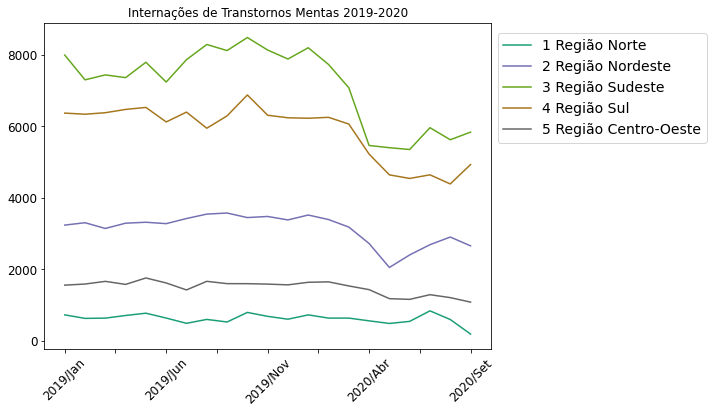

In [515]:
df_transtornos_mentais_internacoes_2019_2020_sem_totais = df_transtornos_mentais_internacoes_2019_2020.drop('Total', axis = 0)
df_transtornos_mentais_internacoes_2019_2020_sem_totais = df_transtornos_mentais_internacoes_2019_2020_sem_totais.drop('Total', axis = 1)
#Plot do Gráfico
axis = df_transtornos_mentais_internacoes_2019_2020_sem_totais.T.plot(figsize = (8,6), x_compat = True, colormap = 'Dark2', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Internações de Transtornos Mentas 2019-2020')
plt.legend(loc = 'right', bbox_to_anchor=(1.50, 0.8), fontsize = 14)

###Para delimitarmos melhor o espoco relacionado aos casos confirmados de Covid-19, vamos considerar apenas os meses do anos de 2020 até Setembro

In [516]:
df_transtornos_mentais_internacoes_2020_sem_totais = df_transtornos_mentais_internacoes_2019_2020_sem_totais[df_transtornos_mentais_internacoes_2019_2020_sem_totais.columns[-9:]]


Definir uma função para setar e retirar a linha e a coluna de 'Total' e uma função para plotar todos os gráficos

In [542]:
def RetiraTotaisSlice2020(tabela_dados):
  tabela_dados = tabela_dados[tabela_dados.columns[-10:]]
  tabela_dados = tabela_dados.drop('Total', axis = 0)
  tabela_dados = tabela_dados.drop('Total', axis = 1)
  return tabela_dados

def plotGrafico(table_dados, cor_map, titulo):
  axis = table_dados.T.plot( figsize = (10,6), colormap = cor_map, fontsize = 12, linewidth=5 )
  plt.xticks(rotation=45)
  plt.title(titulo, {'size':14})
  axis.xaxis.grid(True)
  axis.yaxis.grid(True)
  plt.legend(loc = 'right', bbox_to_anchor=(1.6, 0.8), fontsize = 14)
  return

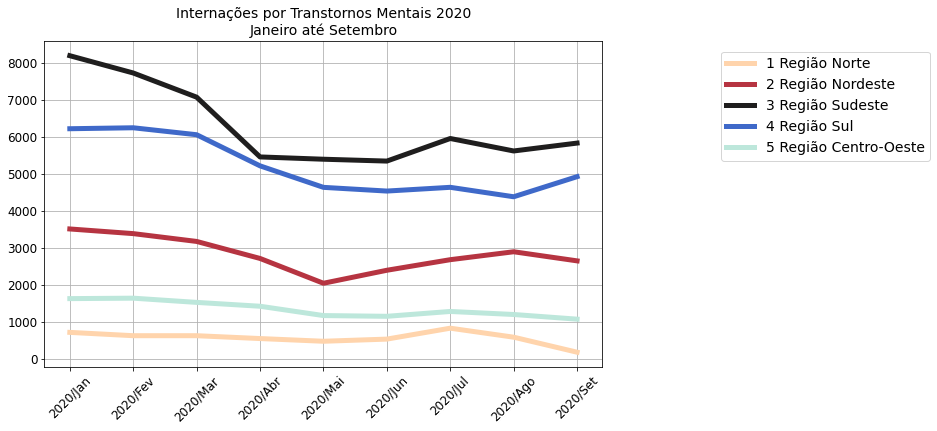

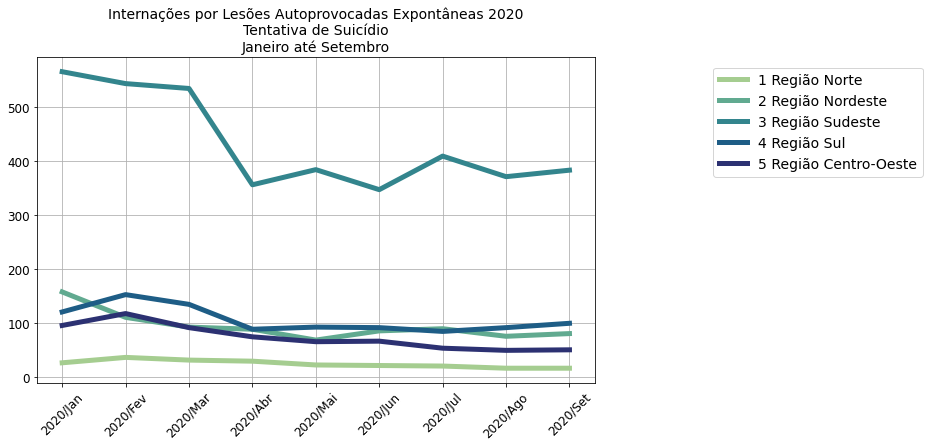

In [590]:
df_lesoes_autoprovocadas_2020 = RetiraTotaisSlice2020(df_lesoes_autoprovocadas_2019_2020)                                    
df_obitos_lesoes_autoprovocadas_2020 = RetiraTotaisSlice2020(df_obitos_lesoes_autoprovocadas_2019_2020)

plotGrafico(df_transtornos_mentais_internacoes_2020_sem_totais, 'icefire_r', 'Internações por Transtornos Mentais 2020\nJaneiro até Setembro')
plotGrafico(df_lesoes_autoprovocadas_2020, 'crest', 'Internações por Lesões Autoprovocadas Expontâneas 2020\nTentativa de Suicídio\nJaneiro até Setembro')

#Considerações
##Gráficos de Internações
No gráfico **"Transtornos Mentais 2020 de Janeiro até Setembro"**, podemos observar que existe uma queda na quantidade de internações, mais acentuada, nas regiões Sudeste, Sul e Nordeste, nos perído do mês de Fevereiro de 2020 a Abril de 2020, inicio da pandemia de Covid-19 no Brasil. Há também uma pequena queda de internações nas regiões Norte e Centro-Oeste.

No gráfico de **Internações por Lesões Autoprovocadas Expontâneas 2020, Tentativa de Suicídio, de Janeiro até Setembro**, percebe-se um número elevado de casos da região Sudeste que também tiveram uma queda na quantidade de internações, mais acentuada, no perído do mês de Fevereiro de 2020 a Abril de 2020, inicio da pandemia de Covid-19 no Brasil. Nas outras regiões também é perceptível a queda no quantitativo de internações no período do inicio da pandemia.

Nos dois gráficos, os valores de internações mantiveram uma estabilidade após o período inicial da pandemia, que é inferior a quantidade de internações no inicio do ano de 2020.

**Uma suposição possível, seria a redução da quantidade de leitos para internações de pacientes de saúde mental, em detrimento dos leitos para os casos de covid-19. Além, da temerosidade dos pacientes e familiares de pessoas com doença mental pela contaminação do Corona vírus.**

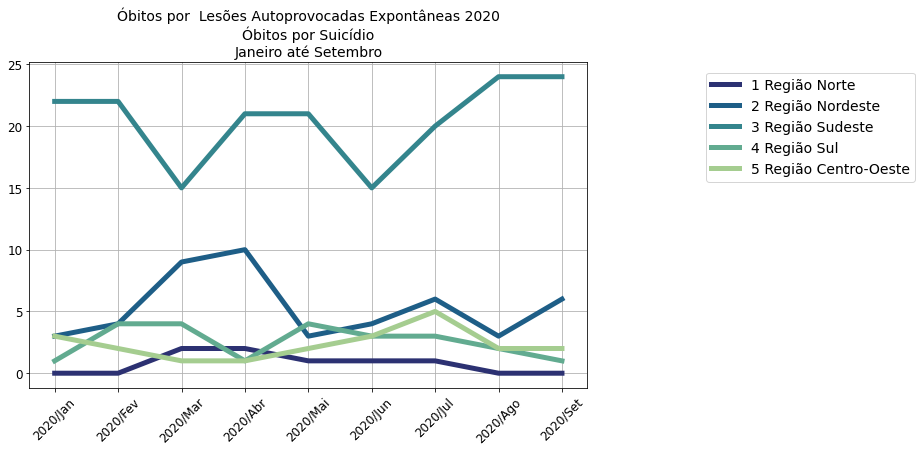

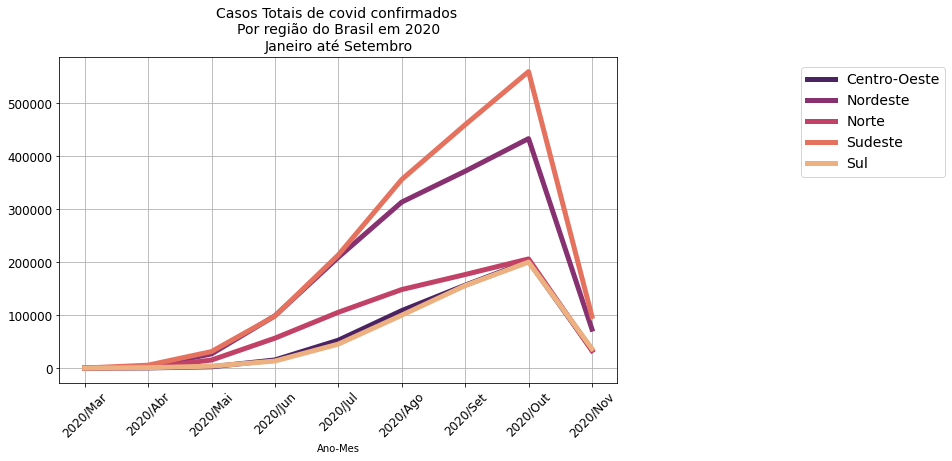

In [578]:
plotGrafico(df_obitos_lesoes_autoprovocadas_2020, 'crest_r', 'Óbitos por  Lesões Autoprovocadas Expontâneas 2020\nÓbitos por Suicídio\nJaneiro até Setembro')
plotGrafico(df_contaminCovid_por_mes_2020/100, 'flare_r', 'Casos Totais de covid confirmados \nPor região do Brasil em 2020\nJaneiro até Setembro')

#Considerações
##Gráficos de Óbitos por Lesões Autoprovocadas Expontâneas - Suicídios
Neste gráfico os valores dos dados são diminutos e espaçados. Há mais dados na região Sudeste. 
A pouca informação disponível nesta base de dados, me levanta a suspeita que esses dados estão distantes da realidade, e parecem refletir uma subnotificação ou até mesmo omissão na coleta de quantitativos de suicídios.
Melhor adotar uma outra método para o estudo deste gráfico

#Considerações
##Gráficos de Casos de Covid por Região do Brasil
No gráfico de **Casos Totais de Covid-19 confirmados Por região do Brasil em 2020 de Janeiro até Setembro**, verifica-se o aumento de casos de COVID-19, em todas as regiões do Brasil apartir do mês de Maio de 2020, atingindo o pico em Outubro de 2020, próximo aos 600 mil casos. 
O decaimento dos casos em Novembro de 2020 se refere o mês não ter findado e o quantitativo de casos confirmados totais ainda estarem indisponíveis.

#Etapa 2
Apartir desta etapa de análise será considerado apenas a região Sudeste, visto que os caso de Covid-19, de Internações por Transtornos Mentais, e de Internações por Lesões Autoprovocadas Expontâneas, tem maior quantitativo e aparentam ser mais bem notificadas que nas demais regiões do Brasil.

Os dados de Óbitos por Lesões Autoprovocadas Expontâneas, Suicídios, serão abandonados, pois a aparente subnotificação, ou não notificação desses casos, reduz a confiabilidade nos dados, possivelmente não se aproximando da realidade







###Isolar os casos da região sudeste do ano de 2020

In [719]:
df_transtornos_mentais_sudeste_2020 = df_transtornos_mentais_internacoes_2020_sem_totais.loc['3 Região Sudeste']
df_lesoes_autoprovocadas_sudeste_2020 = df_lesoes_autoprovocadas_2020.loc['3 Região Sudeste']
df_contaminCovid_sudeste_2020 = df_contaminCovid_por_mes_2020.loc['Sudeste']

#Eliminar o mês de Novembro da tabela de Casos de Covid, pois a totalidade dos dados não está disponível.
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.drop('2020/Nov', axis = 0)

#Eliminar o mês de Outubo da tabela de Casos de Covid, para ser correlato aos casos de internação
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.drop('2020/Out', axis = 0)


In [720]:
#Incluindo 2020/Jan e 2020/Fev nos Casos Covid
s1 = pd.Series([0,0],index=['2020/Jan', '2020/Fev'])
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.append(s1)
df_contaminCovid_sudeste_2020
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.reset_index(level=None)
df_contaminCovid_sudeste_2020['ordem'] = [3,4,5,6,7,8,9,1,2]
df_contaminCovid_sudeste_2020.set_index('ordem', inplace=True)
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.sort_index()
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.reset_index('ordem')
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.drop('ordem', axis= 1)

#Ajustando Nomes de Tabelas e Indices
df_contaminCovid_sudeste_2020 = df_contaminCovid_sudeste_2020.rename(columns=({'index':'mes_ano',0:'casos_confirmados'}))
df_contaminCovid_sudeste_2020.set_index('mes_ano', inplace=True)

,casos_confirmados
mes_ano,
2020/Jan,0
2020/Fev,0
2020/Mar,21367
2020/Abr,557397
2020/Mai,3128419
2020/Jun,9833642
2020/Jul,21377855
2020/Ago,35618976
2020/Set,45954136


Embora os CIDs de Internações por Transtornos Mentais e Internações por Lesões Autoprovocadas Expontâneas sejam diferentes, a partir deste ponto vou juntá-los, seus dados tem a mesma tendência, e os dados de Internações por Lesões Autoprovocadas Expontâneas são inferiores em termos quantitativos.
Além do que, tentativas de suícidio se enquadram em transtornos mentais.
Ainda manterá o mesmo sentido,  e será denominado Internações por Transtornos Mentais

In [746]:
df_inter_transtor_mentais_20202 = df_transtornos_mentais_sudeste_2020 + df_lesoes_autoprovocadas_sudeste_2020

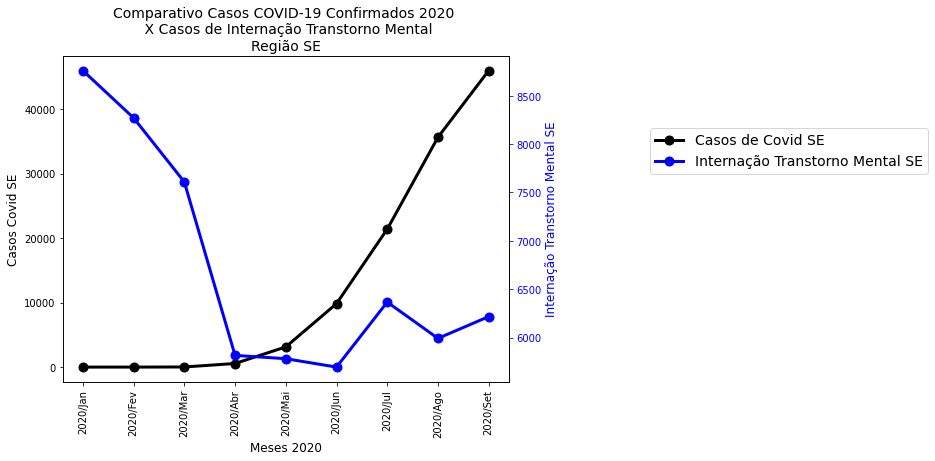

In [753]:
x = df_contaminCovid_sudeste_2020.index
y1 = df_contaminCovid_sudeste_2020/1000
y2 = df_inter_transtor_mentais_20202

#Criar a área de plotagem e os dois eixos y
fig, ax1 = plt.subplots(figsize=(8,6))
plt.xticks( rotation = 90)
ax2 = ax1.twinx()


curva1, = ax1.plot(x, y1, label='Casos de Covid SE', color='k', marker=".", markersize=18, linewidth=3 )
curva2, = ax2.plot(x, y2, label='Internação Transtorno Mental SE', color='b',  marker=".", markersize=18, linewidth=3)

#Criar uma lista para acessar os parametros das curvas
curvas = [curva1, curva2]

#Criar a legenda do gráfico
ax1.legend(curvas, [curve.get_label() for curve in curvas], loc = 'best', bbox_to_anchor=(1.30, 0.8), fontsize = 14)

#Criar os labels de cada eixo
ax1.set_xlabel('Meses 2020', {'size':12})
ax1.set_ylabel('Casos Covid SE', {'size':12}, color=curva1.get_color())
ax2.set_ylabel('Internação Transtorno Mental SE', {'size':12}, color=curva2.get_color())

#Alterar a cor dos eixos y
ax1.tick_params(axis='y', colors=curva1.get_color())
ax2.tick_params(axis='y', colors=curva2.get_color())

plt.title('Comparativo Casos COVID-19 Confirmados 2020 \n X Casos de Internação Transtorno Mental\nRegião SE', {'size':14})
plt.show()

#Considerações
##Gráficos Comparativo Casos COVID-19 Confirmados 2020 X Casos de Internação Transtorno Mental Região SE
Neste gráfico fica mais evidente a constatação de que a quantidade de internações para pessoas com doença mental reduziu em quase 25% quando iniciaram os casos de pandêmia de COVID-19.
Possivelmente, os leitos foram priorizados para os pacientes de COVID-19, ao invés dos pacientes com Transtorno Mental.


#Considerações Finais
A hipótese proposta no inicio do projeto:

**O COVID-19 agravou os aparecimentos de doenças relacionadas ao transtorno mental e de comportamento, como Lesões Autoprovocadas Espontâneas , tentativas de suicídio, e óbito por Lesões Autoprovocadas Espontâneas, suicídio.**

Considerando os dados obtidos no base de dados do SUS, TABNET, a análise destes, os casos de Internação por Transtorno Mental, ou por Lesões Autoprovocadas Espontâneas, e os casos confirmados de COVID-19, a hipótese não se confirma.
Portanto, as doenças relacionadas ao transtorno mental não aumentaram com a pandemia de COVID-19.

Entretanto,

**Limitações dos Dados**

A não internação de pessoas com doenças mentais não indica que elas deixaram de existir, e sim, deixaram de receber os tratamentos antes disponíveis.

Neste trabalho também não se considerou as redes de apoio CRAS, CAPS, clínicas particulares, ou tratamentos da rede privada, com terapeutas, psicólogos e psiquiatras.

Por fim,

Os especialistas na área indicam uma tendência de aumento nos casos de Transtornos mentais durante e no pós-pandemia. 




Para isto vamos utilizar os dados do TABNET de Internações de Transtornos Mentais ou de Comportamentos de 2008 a 2018

In [763]:
df_internacoes_trans_mentais_2008_2018 = pd.read_csv('/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/transtornos_mentais_por_regiao_br_internacoes_2008_2018.csv',
                                                            encoding='latin-1', skiprows=4,skipfooter = 6, sep=';', engine = 'python')

df_internacoes_trans_mentais_2008_2018.set_index('Região', inplace=True)
df_internacoes_trans_mentais_2008_2018= df_internacoes_trans_mentais_2008_2018.drop('Total', axis=0)
df_internacoes_trans_mentais_2008_2018= df_internacoes_trans_mentais_2008_2018.drop('Total', axis=1)
df_internacoes_trans_mentais_2008_2018= df_internacoes_trans_mentais_2008_2018.drop('2019', axis=1)
df_internacoes_trans_mentais_2008_2018= df_internacoes_trans_mentais_2008_2018.drop('2020', axis=1)

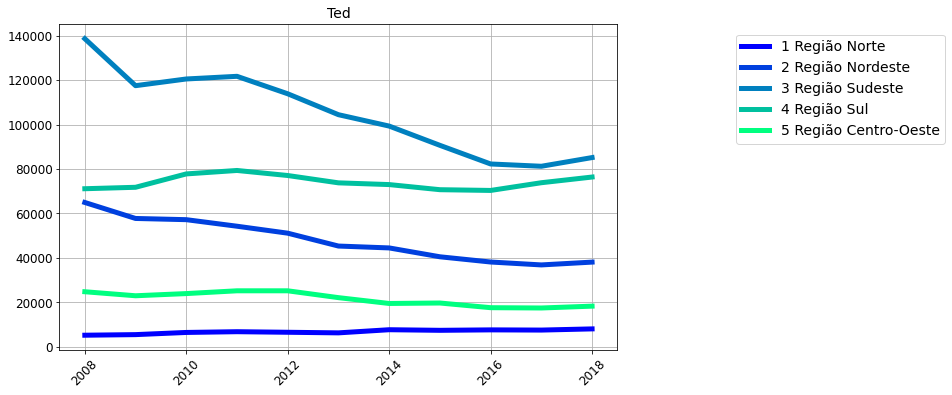

In [765]:
plotGrafico(df_internacoes_trans_mentais_2008_2018, 'winter', "Ted")